Скрипт основанный на  3 стратегиях. Скользящее среднее, Breakeout и комбинированная.

In [1]:
## Подключаем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import pandas as pd
import yfinance as yf
import matplotlib
from pandas_datareader import data as pdr
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
from pandas_datareader import data as web
import datetime
from nsepy import get_history
from nsepython import *
import logging
urllib3_logger = logging.getLogger('urllib3') # Обработчик сообщений, чтобы они не выводились при сборе данных о тикерах
urllib3_logger.setLevel(logging.CRITICAL)

In [92]:
# Задаем список тикеров. Здесь вручную.
list_of_tickers = ["GAZP.ME", "SBER.ME", "LKOH.ME", "GMKN.ME", "YNDX.ME", "NVTK.ME", "ROSN.ME", "POLY.ME", "TCSG.ME", "PLZL.ME", "MGNT.ME", "NLMK.ME", "TATN.ME", "CHMF.ME", "SNGSP.ME", "MTSS.ME", "ALRS.ME", "SNGSP.ME", "FIVE.ME", "IMOEX.ME", "SBERP.ME", "IRAO.ME", "VTBR.ME", "PHOR.ME", "RUAL.ME", "PIKK.ME", "MAGN.ME", "AFKS.ME", "RTKM.ME", "TRNFP.ME", "DSKY.ME", "AFLT.ME", "HYDR.ME", "TATNP.ME", "FEES.ME", "CBOM.ME", "LSRG.ME", "RSTI.ME", "SIBN.ME"]
# ЮАР ["ABG.JO", "AGL.JO", "AMS.JO", "ANG.JO", "APN.JO", "ARI.JO", "AVI.JO", "BID.JO", "BTI.JO", "BVT.JO", "CLS.JO", "CPI.JO", "DRD.JO", "DSY.JO", "EXX.JO", "FFB.JO", "FSR.JO", "GLN.JO", "GML.JO", "GRT.JO", "IMP.JO", "INL.JO", "IPL.JO", "KIO.JO", "LHC.JO", "MCG.JO", "MDI.JO", "MRP.JO", "MTN.JO", "NED.JO", "NHM.JO", "NPN.JO", "NRP.JO", "NTC.JO", "NY1.JO", "OAO.JO", "OMU.JO", "PPH.JO", "PSG.JO", "RDF.JO", "REM.JO", "RES.JO", "RMH.JO", "RMI.JO", "SAP.JO", "SBK.JO", "SHP.JO", "SLM.JO", "SOL.JO", "SSW.JO", "TBS.JO", "TFG.JO", "VOD.JO", "WHL.JO"]
# Польша ["P9O.F", "KGHA.F", "7PZ.F", "PKY1.F", "AL0.F", "1RY.F", "5Y2.F", "7CD.F", "BZI.F", "6PG.F", "CP9.F", "83I.F", "G17.F", "BRU.F", "TPA1.F", "6RK.F", "1T5.F", "SFB1.F", "FBF.F", "1HN.F", "1QT.F", "58S.F", "J2S.SG", "7HD.F", "6HW.SG", "697.F", "1HQ.F", "CHX.F", "WSX.F", "E07.F", "886.F", "MM2.F", "6P5.F", "A6O.F", "9PR.F", "8RP.F"]
# Россия ["GAZP.ME", "SBER.ME", "LKOH.ME", "GMKN.ME", "YNDX.ME", "NVTK.ME", "ROSN.ME", "POLY.ME", "TCSG.ME", "PLZL.ME", "MGNT.ME", "NLMK.ME", "TATN.ME", "CHMF.ME", "SNGSP.ME", "MTSS.ME", "ALRS.ME", "SNGSP.ME", "FIVE.ME", "IMOEX.ME", "SBERP.ME", "IRAO.ME", "VTBR.ME", "PHOR.ME", "RUAL.ME", "PIKK.ME", "MAGN.ME", "AFKS.ME", "RTKM.ME", "TRNFP.ME", "DSKY.ME", "AFLT.ME", "HYDR.ME", "TATNP.ME", "FEES.ME", "CBOM.ME", "LSRG.ME", "RSTI.ME", "SIBN.ME"]
# Турция ["AGHOL.IS", "TURSG.IS", "AKBNK.IS", "AKCNS.IS", "AKSGY.IS", "AKSA.IS", "AKSEN.IS", "ALGYO.IS", "ALARK.IS", "ALBRK.IS", "ALCTL.IS", "ALKIM.IS", "AEFES.IS", "ARCLK.IS", "ARDYZ.IS", "ASELS.IS", "AYGAZ.IS", "BAGFS.IS", "BIMAS.IS", "BIZIM.IS", "BRSAN.IS", "BRISA.IS", "BUCIM.IS", "CLEBI.IS", "CEMTS.IS", "CIMSA.IS", "CCOLA.IS", "DEVA.IS", "DOHOL.IS", "DOAS.IS", "EGEEN.IS", "EKGYO.IS", "ENJSA.IS", "ENKAI.IS", "EREGL.IS", "FROTO.IS", "GARAN.IS", "GOODY.IS", "GOZDE.IS", "GSDHO.IS", "GUBRF.IS", "HALKB.IS", "HEKTS.IS", "INDES.IS", "IPEKE.IS", "ISFIN.IS", "ISGYO.IS", "ISMEN.IS", "ISDMR.IS", "KRDMD.IS", "KAREL.IS", "KARTN.IS", "KERVT.IS", "KCHOL.IS", "KORDS.IS", "KOZAL.IS", "KOZAA.IS", "LOGO.IS", "MAVI.IS", "MGROS.IS", "MPARK.IS", "NTHOL.IS", "NETAS.IS", "ODAS.IS", "OTKAR.IS", "OYAKC.IS", "OZKGY.IS", "PGSUS.IS", "PETKM.IS", "PETUN.IS", "PNSUT.IS", "SAHOL.IS", "SASA.IS", "SKBNK.IS", "SELEC.IS", "SISE.IS", "SOKM.IS", "TATGD.IS", "TAVHL.IS", "TKFEN.IS", "THYAO.IS", "TOASO.IS", "TRGYO.IS", "TSKB.IS", "TMSN.IS", "TUPRS.IS", "TTKOM.IS", "TTRAK.IS", "TKC", "THBIY", "ISCTR.IS", "TURSG.IS", "ULKER.IS", "VAKBN.IS", "VESTL.IS", "YKBNK.IS", "YATAS.IS", "ZOREN.IS"]
# Задаем диапазон дат в котором нужно собирать все данные по тикерам
start = datetime.datetime(2020,1,1)
end = datetime.datetime.today().date() # сегодняшняя дата, чтобы не менять вручную.
# Получаем данные из Yahoo. Именно этот способ позволяет получить данные с тикерами в столбцах.
f = pdr.DataReader(list_of_tickers, 'yahoo', start, end)

In [93]:
f 

Attributes   Adj Close                                                      \
Symbols        GAZP.ME     SBER.ME      LKOH.ME       GMKN.ME      YNDX.ME   
Date                                                                         
2020-01-03  238.669540  181.040695  5835.386719  17776.292969  2685.000000   
2020-01-06  236.411850  180.259720  5916.974609  17904.259766  2672.000000   
2020-01-08  235.711502  183.987030  6023.131836  18143.740234  2677.000000   
2020-01-09  234.126526  183.163467  5961.477051  18132.771484  2728.399902   
2020-01-10  232.126862  183.305481  6017.105469  18169.333984  2725.000000   
...                ...         ...          ...           ...          ...   
2021-06-22  275.779999  309.649994  6687.000000  25012.000000  4999.600098   
2021-06-23  277.769989  310.619995  6640.000000  25354.000000  4996.399902   
2021-06-24  276.890015  310.470001  6748.500000  24434.000000  5066.200195   
2021-06-25  277.220001  311.799988  6782.500000  24724.000000  5080.000000   
2021-06-28  277.480011  309.570007  6763.500000  24936.000000  5084.799805   

Attributes                                                                   \
Symbols         NVTK.ME     ROSN.ME      POLY.ME      TCSG.ME       PLZL.ME   
Date                                                                          
2020-01-03  1208.443237  430.622528   987.868164  1331.596436   6917.443848   
2020-01-06  1215.135498  429.397308  1001.448547  1322.002197   7046.089844   
2020-01-08  1267.144531  426.004364   972.690125  1349.385498   7090.237793   
2020-01-09  1280.529297  433.732758   967.497742  1365.975586   6955.420410   
2020-01-10  1249.362061  446.267822   979.580200  1397.556519   6854.782227   
...                 ...         ...          ...          ...           ...   
2021-06-22  1544.400024  550.900024  1631.000000  5814.399902  14695.500000   
2021-06-23  1543.199951  569.500000  1636.800049  5931.000000  14755.500000   
2021-06-24  1509.800049  566.500000  1626.599976  6132.799805  14408.500000   
2021-06-25  1548.000000  563.349976  1624.800049  6126.200195  14311.000000   
2021-06-28  1541.199951  554.900024  1625.000000  6135.399902  14338.500000   

Attributes  ...   Volume                                                  \
Symbols     ... TRNFP.ME    DSKY.ME     AFLT.ME       HYDR.ME   TATNP.ME   
Date        ...                                                            
2020-01-03  ...   2292.0   957550.0   2503070.0  5.159720e+08   544609.0   
2020-01-06  ...    909.0  1239520.0   1905060.0  5.997260e+08   213950.0   
2020-01-08  ...   1375.0  1170220.0   3041640.0  1.178013e+09   467733.0   
2020-01-09  ...   1761.0  1386340.0   6643990.0  2.442351e+09  1026960.0   
2020-01-10  ...    816.0  1374660.0   5788320.0  1.481835e+09   906030.0   
...         ...      ...        ...         ...           ...        ...   
2021-06-22  ...   1464.0  1448220.0   8800060.0  1.653740e+08   526936.0   
2021-06-23  ...    967.0  3442460.0  14952300.0  8.525430e+08   614338.0   
2021-06-24  ...    899.0  1771710.0  19805262.0  7.635850e+08   455001.0   
2021-06-25  ...   1585.0  1088120.0  13860071.0  3.014470e+08   722273.0   
2021-06-28  ...   2225.0  1627820.0  11830196.0  3.078920e+08   529379.0   

Attributes                                                              
Symbols          FEES.ME     CBOM.ME   LSRG.ME      RSTI.ME    SIBN.ME  
Date                                                                    
2020-01-03  2.141930e+09   3937612.0   68895.0  159043000.0   608326.0  
2020-01-06  2.355230e+09   5131600.0   92949.0  126975000.0   380674.0  
2020-01-08  1.377490e+09   7389010.0   97383.0  255112000.0   632770.0  
2020-01-09  3.970930e+09  24994900.0  196621.0  265035000.0   672370.0  
2020-01-10  3.130910e+09  32782901.0  161341.0  301813000.0  2157680.0  
...                  ...         ...       ...          ...        ...  
2021-06-22  3.660900e+08  57419605.0   91413.0  202415000.0  1557400.0  
2021-

In [94]:
f["Adj Close"]

Symbols,GAZP.ME,SBER.ME,LKOH.ME,GMKN.ME,YNDX.ME,NVTK.ME,ROSN.ME,POLY.ME,TCSG.ME,PLZL.ME,...,TRNFP.ME,DSKY.ME,AFLT.ME,HYDR.ME,TATNP.ME,FEES.ME,CBOM.ME,LSRG.ME,RSTI.ME,SIBN.ME
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,238.669540,181.040695,5835.386719,17776.292969,2685.000000,1208.443237,430.622528,987.868164,1331.596436,6917.443848,...,163902.468750,93.137329,103.339996,0.528559,716.630432,0.189701,5.917,692.104980,1.335489,386.490234
2020-01-06,236.411850,180.259720,5916.974609,17904.259766,2672.000000,1215.135498,429.397308,1001.448547,1322.002197,7046.089844,...,162382.718750,93.926468,103.519997,0.533895,718.875977,0.191068,5.886,706.283813,1.336527,387.352692
2020-01-08,235.711502,183.987030,6023.131836,18143.740234,2677.000000,1267.144531,426.004364,972.690125,1349.385498,7090.237793,...,164869.578125,94.054939,102.879997,0.538278,731.373047,0.189355,5.907,698.485474,1.351527,392.209930
2020-01-09,234.126526,183.163467,5961.477051,18132.771484,2728.399902,1280.529297,433.732758,967.497742,1365.975586,6955.420410,...,164961.687500,95.357948,104.500000,0.555430,751.680908,0.193437,5.918,706.815491,1.395773,392.709259
2020-01-10,232.126862,183.305481,6017.105469,18169.333984,2725.000000,1249.362061,446.267822,979.580200,1397.556519,6854.782227,...,164409.062500,96.862816,105.040001,0.560480,755.195679,0.195841,5.901,704.511475,1.423603,405.465179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-22,275.779999,309.649994,6687.000000,25012.000000,4999.600098,1544.400024,550.900024,1631.000000,5814.399902,14695.500000,...,172100.000000,150.220001,71.720001,0.846000,510.600006,0.221280,6.486,775.200012,1.365600,425.744263
2021-06-23,277.769989,310.619995,6640.000000,25354.000000,4996.399902,1543.199951,569.500000,1636.800049,5931.000000,14755.500000,...,172050.000000,149.220001,70.480003,0.863800,513.799988,0.221700,6.484,774.799988,1.376800,425.500000
2021-06-24,276.890015,310.470001,6748.500000,24434.000000,5066.200195,1509.800049,566.500000,1626.599976,6132.799805,14408.500000,...,171900.000000,148.660004,69.139999,0.851000,507.100006,0.220840,6.434,767.200012,1.372800,430.649994


In [146]:
# Расчитываем прирост данных в таблице по строкам
data_pc = f.pct_change()

In [147]:
# Выбираем из всех данных, только данные по цене закрытия
data_pc = pd.DataFrame(data_pc["Adj Close"])
data_pc

Symbols,GAZP.ME,SBER.ME,LKOH.ME,GMKN.ME,YNDX.ME,NVTK.ME,ROSN.ME,POLY.ME,TCSG.ME,PLZL.ME,...,TRNFP.ME,DSKY.ME,AFLT.ME,HYDR.ME,TATNP.ME,FEES.ME,CBOM.ME,LSRG.ME,RSTI.ME,SIBN.ME
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,-0.009459,-0.004314,0.013982,0.007199,-0.004842,0.005538,-0.002845,0.013747,-0.007205,0.018597,...,-0.009272,0.008473,0.001742,0.010096,0.003133,0.007205,-0.005239,0.020487,0.000777,0.002232
2020-01-08,-0.002962,0.020677,0.017941,0.013376,0.001871,0.042801,-0.007902,-0.028717,0.020714,0.006266,...,0.015315,0.001368,-0.006182,0.008210,0.017384,-0.008965,0.003568,-0.011041,0.011223,0.012540
2020-01-09,-0.006724,-0.004476,-0.010236,-0.000605,0.019201,0.010563,0.018142,-0.005338,0.012295,-0.019015,...,0.000559,0.013854,0.015747,0.031864,0.027767,0.021557,0.001862,0.011926,0.032738,0.001273
2020-01-10,-0.008541,0.000775,0.009331,0.002016,-0.001246,-0.024339,0.028900,0.012488,0.023120,-0.014469,...,-0.003350,0.015781,0.005167,0.009092,0.004676,0.012428,-0.002873,-0.003260,0.019939,0.032482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-22,0.016588,0.001358,0.002248,-0.008326,-0.006715,-0.013037,0.020280,0.007412,0.016184,0.006197,...,0.000000,0.000933,0.008720,-0.000945,0.005118,-0.004320,0.009180,-0.002573,-0.007197,0.030264
2021-06-23,0.007216,0.003133,-0.007029,0.013673,-0.000640,-0.000777,0.033763,0.003556,0.020054,0.004083,...,-0.000291,-0.006657,-0.017289,0.021040,0.006267,0.001898,-0.000308,-0.000516,0.008201,-0.000574
2021-06-24,-0.003168,-0.000483,0.016340,-0.036286,0.013970,-0.021643,-0.005268,-0.006232,0.034025,-0.023517,...,-0.000872,-0.003753,-0.019013,-0.014818,-0.013040,-0.003879,-0.007711,-0.009809,-0.002905,0.012103


In [148]:
# Расчитываем стандарное отклонение по каждому тикеру за год. Так определяем волатильность актива.
data_std = data_pc.loc['2020-05-27':'2021-05-26'].std()*(252**0.5)*100 
data_std.head(25)

Symbols
GAZP.ME     22.779763
SBER.ME     27.232776
LKOH.ME     28.116449
GMKN.ME     30.016454
YNDX.ME     32.414237
NVTK.ME     29.619540
ROSN.ME     24.384742
POLY.ME     35.169639
TCSG.ME     48.707512
PLZL.ME     34.010272
MGNT.ME     23.893065
NLMK.ME     25.232171
TATN.ME     32.618252
CHMF.ME     24.764172
SNGSP.ME    14.357358
MTSS.ME     13.176227
ALRS.ME     27.163608
FIVE.ME     27.999819
IMOEX.ME    15.756930
SBERP.ME    23.516356
IRAO.ME     22.170814
VTBR.ME     27.172626
PHOR.ME     20.163370
RUAL.ME     30.767137
PIKK.ME     25.234471
dtype: float64

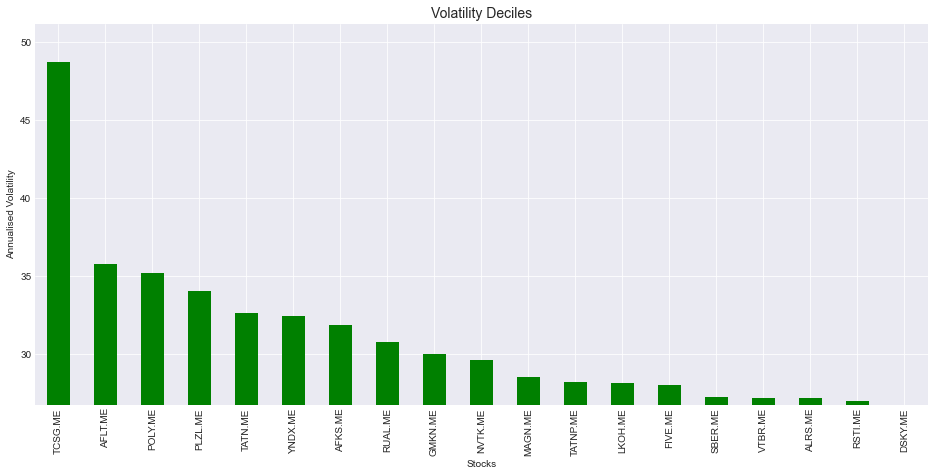

In [149]:
# Сортируем все тикеры по волатильности (стд отклонению).
vol_sorted = data_std.sort_values(ascending=False)
# Выбираем нужно количество процентов от всех тикеров для портфелы. Сюда попадают самые волатильные компании.
top_decile = vol_sorted[:int(len(data_std)*0.5)] # Меняем процент компаний Тут
top_decile.plot.bar(figsize=(16,7),color='green',ylim=top_decile.min())
plt.title('Volatility Deciles', fontsize=14)
plt.xlabel('Stocks')
plt.ylabel('Annualised Volatility')
plt.show()

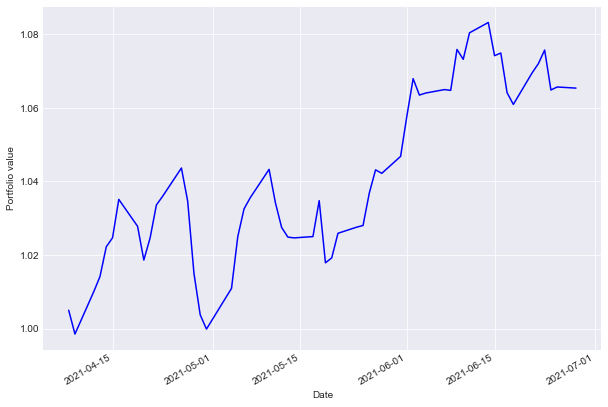

In [150]:
# снова возвращаемся к первоначальной таблице с полученными данными. Берем цену закрытия и преобразуем в ДФ
data = pd.DataFrame(f["Adj Close"])
# Выбираем из первоначальной таблицы нужный период жля бэктестинга
stock_data = data.loc['2021-4-7':'2021-6',top_decile.index]
#stock_data = stock_data.drop('TFG.JO', 1)
#stock_data.loc['2015-11-30', '7PZ.F'] = 8.846299743652344
# Расчитываем процентное изменение цены закрытия
stock_data_pc = stock_data.pct_change()
# создаем массив Портфолио в нем в дальнейшем и будут расчитываться доходности и сигналы
portfolio = pd.DataFrame()
# Расчитываем среднюю доходность портфеля. Всех акций сразу.
portfolio['returns'] = stock_data_pc.mean(axis=1)
# Расчитываем кумулятивную доходность
portfolio['value'] = (portfolio+1).cumprod()
portfolio = portfolio.dropna()
portfolio.value.plot(color='b',figsize=(10,7))
plt.ylabel("Portfolio value")
plt.show()

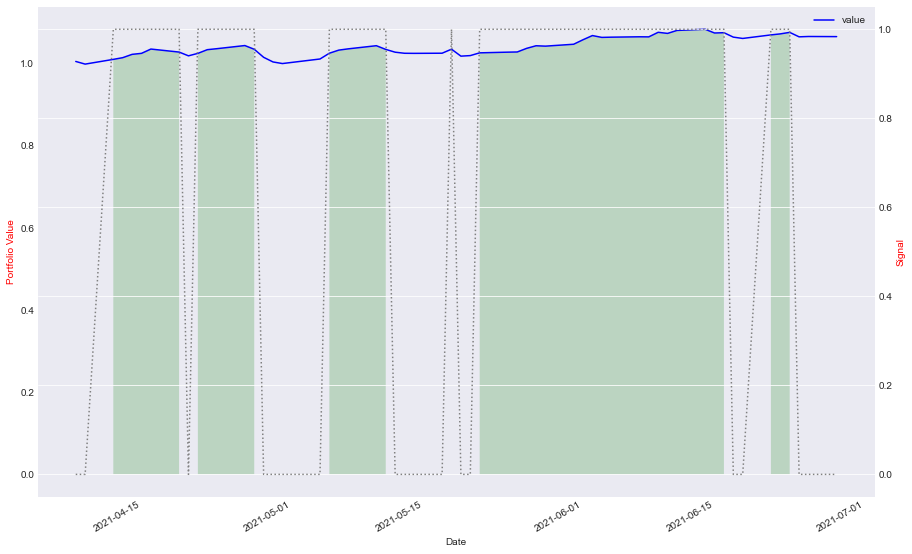

In [151]:
def get_strategy_returns_sma(portfolio):
    # Расчитываем скользящую среднюю за 10 дней    
    
    # Тут у нас 2 вида скользящих средних: SMA и EMA. При необходимости нужно раскоментить SMA.
    
    #portfolio['sma10'] = portfolio.value.rolling(window=10).mean() # Это именно SMA 
    
    portfolio['sma10'] = pd.Series.ewm(portfolio['value'], span=10).mean() # Это именно EMA просто не стал переименновывать переменную
    
    # Вычисляем торговые сигналы
    portfolio['signal'] = np.where(portfolio.value > portfolio.sma10,1,0)
    # Расчитываем доходность стратегии
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

def plot_signal(portfolio):
    portfolio['value'].plot(color='blue')    
    plt.fill_between(portfolio.index, portfolio.value, where=(portfolio.signal==1), facecolor='g', alpha=0.2)      
    plt.legend()
    plt.ylabel('Portfolio Value',color='r')
    # Plot the signal values    
    portfolio['signal'].plot(secondary_y=True,figsize=(15,10),color='grey', linestyle='dotted')
    plt.ylabel('Signal',color='r')
    plt.show()

portfolio = get_strategy_returns_sma(portfolio)    
plot_signal(portfolio)   

In [152]:
portfolio

,returns,value,sma10,signal,str_returns
Date,,,,,
2021-04-08,0.004970,1.004970,1.004970,0,-0.000000
2021-04-09,-0.006446,0.998493,1.001408,0,0.000000
2021-04-12,0.011527,1.010003,1.004863,1,0.004110
2021-04-13,0.004110,1.014154,1.007924,1,0.007962
2021-04-14,0.007962,1.022229,1.012030,1,0.002387
2021-04-15,0.002387,1.024668,1.015313,1,0.010198
2021-04-16,0.010198,1.035118,1.020085,1,-0.007070
2021-04-19,-0.007070,1.027800,1.021840,1,-0.008929
2021-04-20,-0.008929,1.018623,1.021140,0,0.000000


The Sharpe ratio is 0.83 


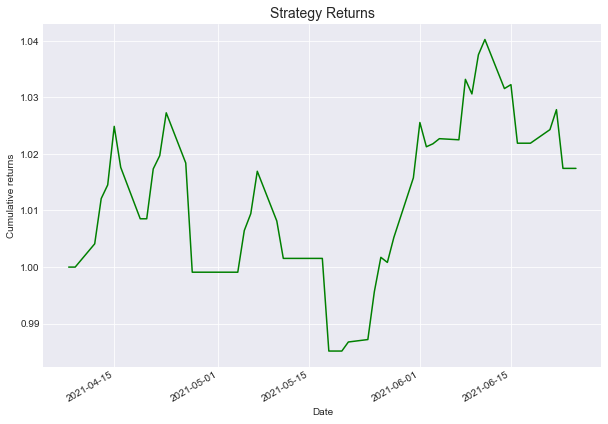

The maximum drawdown is -4.10


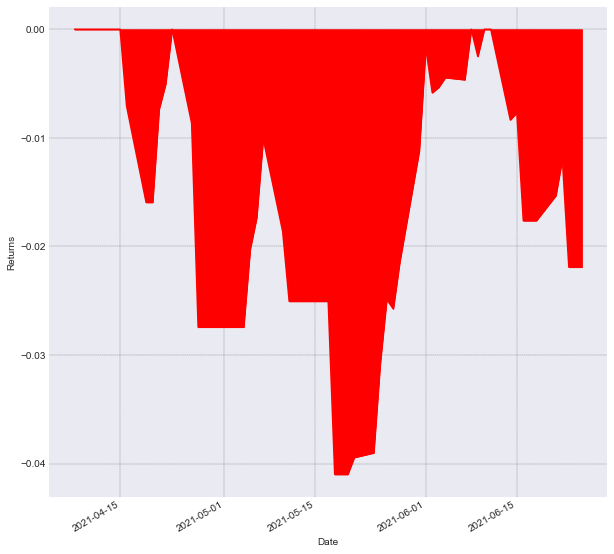

In [153]:
# Функция расчитывает показатели коэф. Шарпа, Кумулятивной доходности, Максимального падения.
def plot_returns_dd(portfolio):
    # ----------- Sharpe ratio ------------------
    sharpe_ratio = np.mean(portfolio.str_returns)/np.std(portfolio.str_returns)*(252**0.5)
    print('The Sharpe ratio is %.2f ' % sharpe_ratio)

    # ----------- Cumulative strategy returns ------------------
    portfolio['cum_str_returns'] = (portfolio['str_returns']+1).cumprod()
    # Plot the cumulative strategy returns
    portfolio['cum_str_returns'].plot(figsize=(10,7), color='green')
    plt.title('Strategy Returns', fontsize=14)
    plt.ylabel('Cumulative returns')
    plt.show()        

    # ----------- Drawdown ------------------    
    # Calculate the running maximum
    running_max = np.maximum.accumulate(portfolio['cum_str_returns'].dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = (portfolio['cum_str_returns'])/running_max - 1
    max_dd = drawdown.min()*100
    print('The maximum drawdown is %.2f' % max_dd)
    # Plot the drawdowns
    drawdown.plot(color='r',figsize=(10,10))
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()    
    
plot_returns_dd(portfolio)   

In [154]:
# Выводим доходность по стратегии скользящих средних
cumulative_return = portfolio['cum_str_returns'][-2] - 1
print("Доходность по стратегии Скользящей средней")
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))

Доходность по стратегии Скользящей средней
cumulative_return = 1.74%


In [155]:
# выводим таблицу портфолио с сигналами за последние 15 дней
portfolio.tail(15)

,returns,value,sma10,signal,str_returns,cum_str_returns
Date,,,,,,
2021-06-08,-0.000193,1.064781,1.055580,1,0.010447,1.033175
2021-06-09,0.010447,1.075905,1.059276,1,-0.002494,1.030598
2021-06-10,-0.002494,1.073221,1.061812,1,0.006715,1.037518
2021-06-11,0.006715,1.080428,1.065197,1,0.002601,1.040217
2021-06-14,0.002601,1.083238,1.068477,1,-0.008336,1.031546
2021-06-15,-0.008336,1.074209,1.069519,1,0.000673,1.032240
2021-06-16,0.000673,1.074931,1.070503,1,-0.010027,1.021890
2021-06-17,-0.010027,1.064153,1.069349,0,-0.000000,1.021890
2021-06-18,-0.003008,1.060952,1.067822,0,0.000000,1.021890


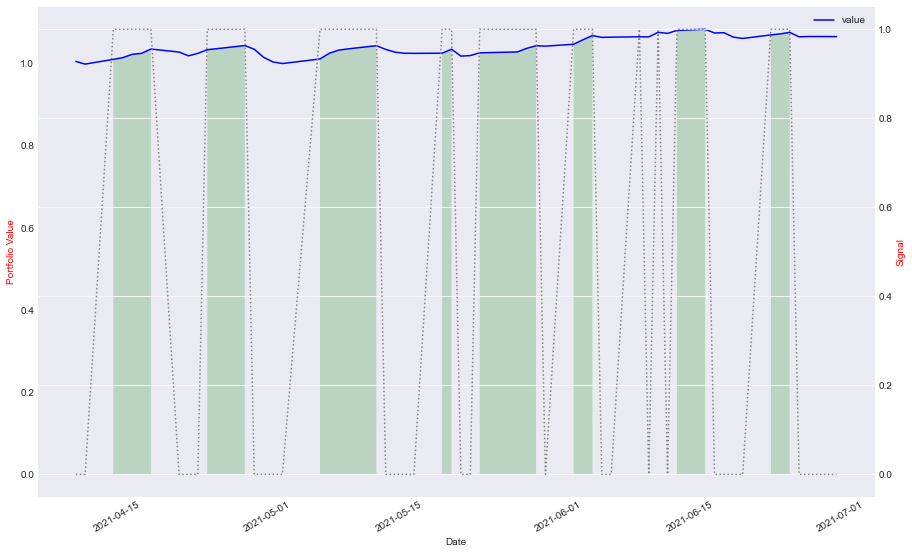

The Sharpe ratio is 2.86 


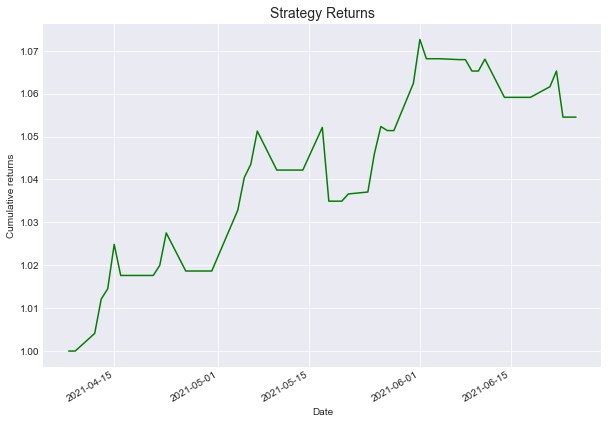

The maximum drawdown is -1.69


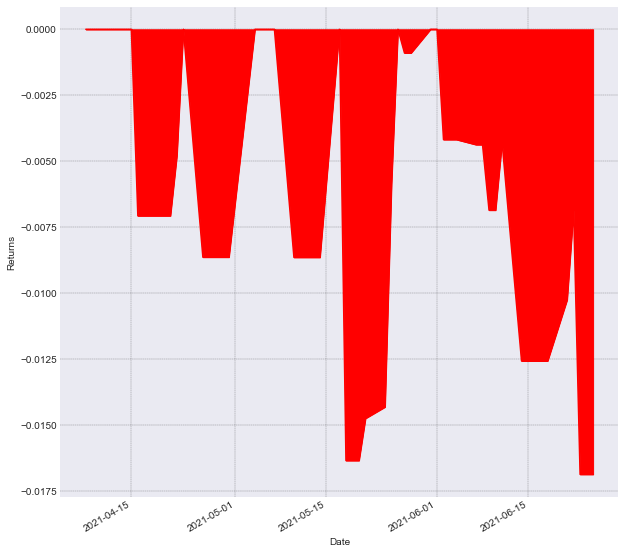

In [156]:
def get_strategy_returns_breakout(portfolio):
    # Расчитываем торговые сигналы по стратегии Breakout
    portfolio['high'] = portfolio.value.rolling(window=3).max()
    portfolio['signal'] = np.where(portfolio.value>=portfolio.high,1,0)
    # Расчитываем доходность стратегии
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

portfolio = get_strategy_returns_breakout(portfolio)
plot_signal(portfolio)    
plot_returns_dd(portfolio)

In [157]:
# Выводим доходность по стратегии Breakout
cumulative_return = portfolio['cum_str_returns'][-2] - 1
print("Доходность по стратегии Breakout")
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))

Доходность по стратегии Breakout
cumulative_return = 5.45%


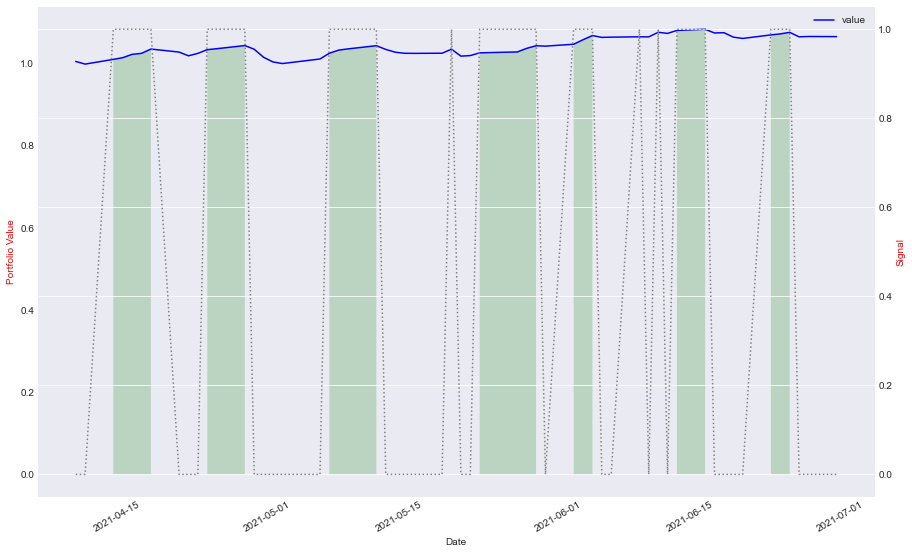

The Sharpe ratio is 1.76 


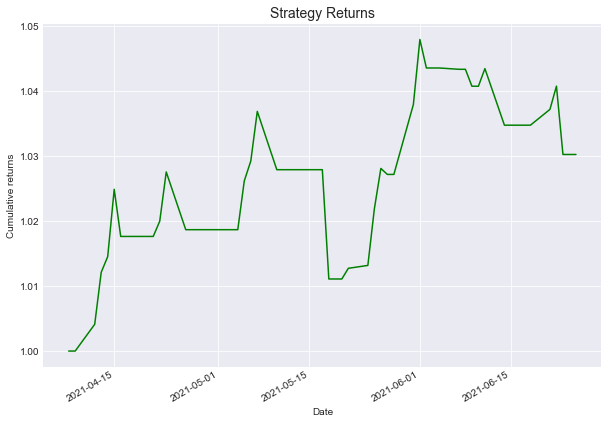

The maximum drawdown is -2.49


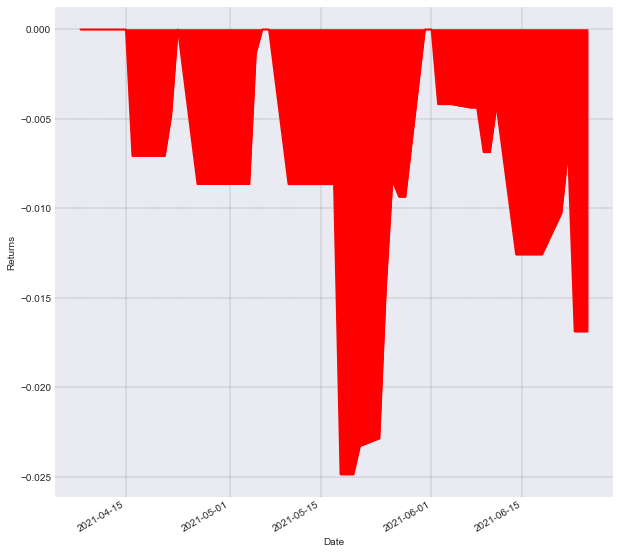

In [158]:
# Функция расчитывает совместную стратегию Скользящие средние + Breakout
def get_strategy_returns_sma_breakout(portfolio):
    # Расчитываем скользящую среднюю за 10 дней    
    
    # Тут у нас 2 вида скользящих средних: SMA и EMA. При необходимости нужно раскоментить SMA. 
    
    #sma10 = portfolio.value > portfolio.value.rolling(window=10).mean() # Это именно SMA 
    
    sma10 = portfolio.value > pd.Series.ewm(portfolio['value'], span=10).mean() # Это именно EMA просто не стал переименновывать переменную
    
    # Вычисляем торговые сигналы по стратегии Breakout
    breakout = portfolio.value>=portfolio.value.rolling(window=3).max()

    # Вычисляем торговые сигналы по стратегии Скользящих Средних
    portfolio['signal'] = np.where(sma10 & breakout,1,0)

    # Расчитываем доходность стратегии
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

portfolio = get_strategy_returns_sma_breakout(portfolio)
plot_signal(portfolio)    
plot_returns_dd(portfolio)   

In [159]:
# Выводим доходность комбинированной стратегии
cumulative_return = portfolio['cum_str_returns'][-2] - 1
print("Доходность комбинированной стратегии")
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))

Доходность комбинированной стратегии
cumulative_return = 3.02%


In [160]:
# Выводим список тикеров портфеля
top_decile

Symbols
TCSG.ME     48.707512
AFLT.ME     35.735699
POLY.ME     35.169639
PLZL.ME     34.010272
TATN.ME     32.618252
YNDX.ME     32.414237
AFKS.ME     31.862373
RUAL.ME     30.767137
GMKN.ME     30.016454
NVTK.ME     29.619540
MAGN.ME     28.514128
TATNP.ME    28.191545
LKOH.ME     28.116449
FIVE.ME     27.999819
SBER.ME     27.232776
VTBR.ME     27.172626
ALRS.ME     27.163608
RSTI.ME     26.965643
DSKY.ME     26.755966
dtype: float64

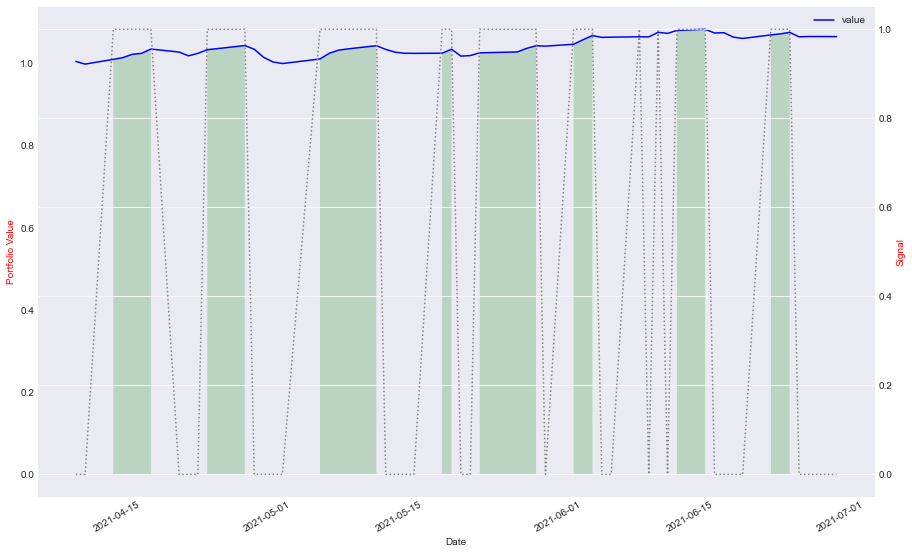

The Sharpe ratio is 2.86 


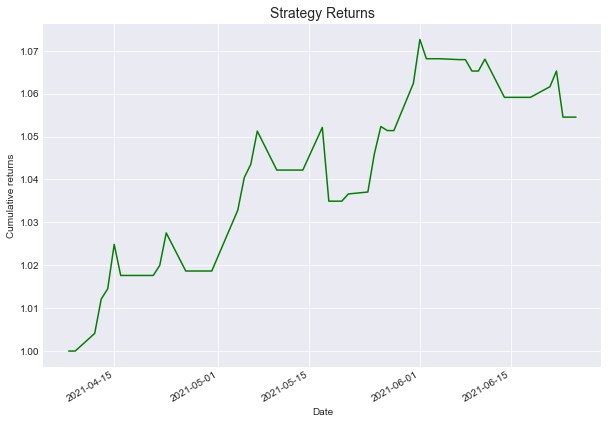

The maximum drawdown is -1.69


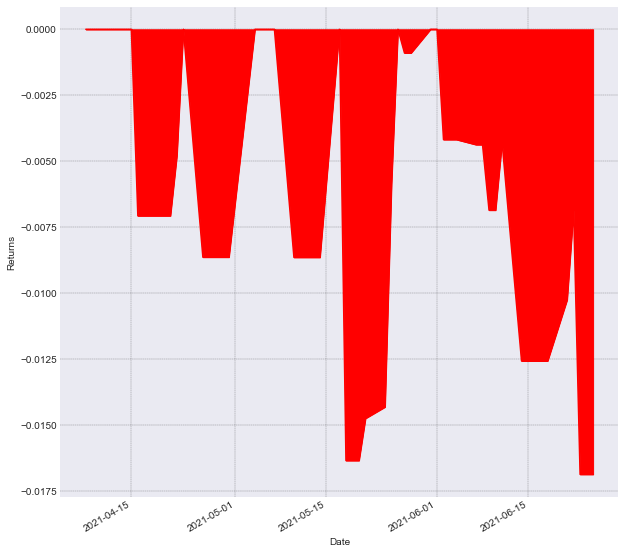

In [161]:
def get_strategy_returns_Cross_SMA(portfolio):
    # Расчитываем торговые сигналы по стратегии Песечения SMA линий
        
    data['SMA10'] = pd.Series.ewm(portfolio['value'], span=10).mean()
    data['SMA20'] = pd.Series.ewm(portfolio['value'], span=20).mean()
    sma10 = data['SMA10'] > data['SMA20']
    price = data['Price'] > data['SMA20']
    portfolio['signal'] = np.where(sma10 & price,1,0)

    # Расчитываем доходность стратегии
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

portfolio = get_strategy_returns_breakout(portfolio)
plot_signal(portfolio)    
plot_returns_dd(portfolio)

In [162]:
# Выводим доходность комбинированной стратегии
cumulative_return = portfolio['cum_str_returns'][-2] - 1
print("Доходность стратегии пересечения скользящих средних")
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))

Доходность стратегии пересечения скользящих средних
cumulative_return = 5.45%
